In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
 


In [3]:
df = pd.read_csv("retail_store_inventory.csv")
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [4]:
df.shape

(73100, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [6]:
df.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

In [7]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print("\nAdditional Statistics:")
print(f"Total number of stores       :{df['Store ID'].nunique()}")
print(f"Total number of products     :{df['Product ID'].nunique()}")
print(f"Date range                   :from {df['Date'].min()} to {df['Date'].max()}")


Additional Statistics:
Total number of stores       :5
Total number of products     :20
Date range                   :from 2022-01-01 to 2024-01-01


In [10]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

## Drop unneeded Columns

In [11]:
df.drop(columns=['Date','Store ID','Product ID'],axis=1,inplace=True)

In [13]:
df.columns

Index(['Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Demand Forecast', 'Price', 'Discount', 'Weather Condition',
       'Holiday/Promotion', 'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [14]:
df.head()

Category Region  Inventory Level  Units Sold  Units Ordered  \
0    Groceries  North              231         127             55   
1         Toys  South              204         150             66   
2         Toys   West              102          65             51   
3         Toys  North              469          61            164   
4  Electronics   East              166          14            135   

   Demand Forecast  Price  Discount Weather Condition  Holiday/Promotion  \
0           135.47  33.50        20             Rainy                  0   
1           144.04  63.01        20             Sunny                  0   
2            74.02  27.99        10             Sunny                  1   
3            62.18  32.72        10            Cloudy                  1   
4             9.26  73.64         0             Sunny                  0   

   Competitor Pricing Seasonality  
0               29.69      Autumn  
1               66.16      Autumn  
2               31.32      Summer  
3               34.74      Autumn  
4               68.95      Summer

In [15]:
numarical_columns = ['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing']

for col in numarical_columns:
    fig = px.box(df, x=col)
    fig.update_layout(height=400, width=800, title_text=col)
    fig.show()

In [16]:
CategoryCounts = df['Category'].value_counts().reset_index()
CategoryCounts

Category  count
0    Furniture  14699
1         Toys  14643
2     Clothing  14626
3    Groceries  14611
4  Electronics  14521

In [17]:
fig = px.bar(CategoryCounts,
             x='Category',
             y='count',
             title='<b>Distribution of Category by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#17becf']
             )
fig.show()

In [18]:
RegionCounts = df['Region'].value_counts().reset_index()
RegionCounts

Region  count
0   East  18349
1  South  18297
2  North  18228
3   West  18226

In [19]:
fig = px.bar(RegionCounts,
             x='Region',
             y='count',
             title='<b>Distribution of Region by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#bcbd22']
             )
fig.show()

In [20]:
InventoryDes = df['Inventory Level'].describe()
InventoryDes

count    73100.000000
mean       274.469877
std        129.949514
min         50.000000
25%        162.000000
50%        273.000000
75%        387.000000
max        500.000000
Name: Inventory Level, dtype: float64

In [21]:
fig = px.histogram(df,
                   x='Inventory Level',
                   nbins=15,
                   title='<b>Inventory Level Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['brown']
                   )

fig.show()

In [22]:
SalesDes = df['Units Sold'].describe()
SalesDes

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64

In [23]:
fig = px.histogram(df,
                   x='Units Sold',
                   nbins=20,
                   title='<b>Sales Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['grey']
                   )

fig.show()

In [24]:
OrdersDes = df['Units Ordered'].describe()
OrdersDes

count    73100.000000
mean       110.004473
std         52.277448
min         20.000000
25%         65.000000
50%        110.000000
75%        155.000000
max        200.000000
Name: Units Ordered, dtype: float64

In [25]:
fig = px.histogram(df,
                   x='Units Ordered',
                   nbins=15,
                   title='<b>Units Ordered Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['pink']
                   )

fig.show()

In [26]:
DemandDes = df['Demand Forecast'].describe()
DemandDes

count    73100.000000
mean       141.494720
std        109.254076
min         -9.990000
25%         53.670000
50%        113.015000
75%        208.052500
max        518.550000
Name: Demand Forecast, dtype: float64

In [27]:
fig = px.histogram(df,
                   x='Demand Forecast',
                   nbins=20,
                   title='<b>Demand Forecast Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['purple']
                   )

fig.show()

<Axes: xlabel='Demand Forecast', ylabel='Count'>

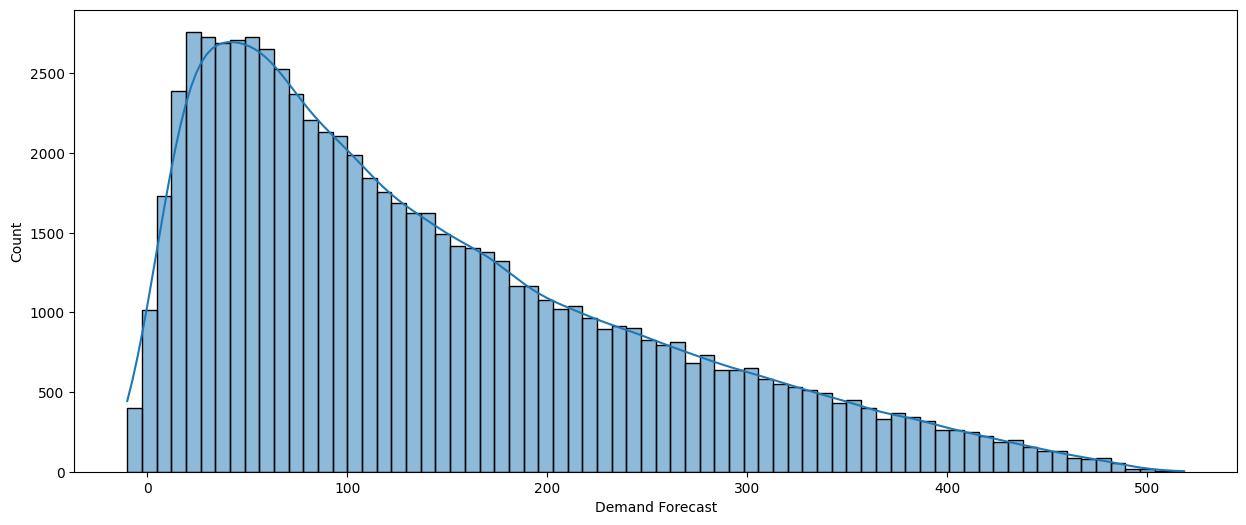

In [28]:
plt.figure(figsize=((15,6)))
sns.histplot(df["Demand Forecast"],kde=True)

In [29]:
PriceDes = df['Price'].describe()
PriceDes

count    73100.000000
mean        55.135108
std         26.021945
min         10.000000
25%         32.650000
50%         55.050000
75%         77.860000
max        100.000000
Name: Price, dtype: float64

In [30]:
fig = px.histogram(df,
                   x='Price',
                   nbins=15,
                   title='<b>Price Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['blue']
                   )

fig.show()

In [31]:
DiscountCounts = df['Discount'].value_counts().reset_index()
DiscountCounts

Discount  count
0        20  14715
1         0  14662
2        15  14624
3         5  14591
4        10  14508

In [32]:
fig = px.pie(DiscountCounts,
             names='Discount',
             values='count',
             title='<b>Discount Distribution<b>',
             width=1000,
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
             )

fig.show()

In [33]:
WeatherCounts = df['Weather Condition'].value_counts().reset_index()
WeatherCounts

Weather Condition  count
0             Sunny  18290
1             Rainy  18278
2             Snowy  18272
3            Cloudy  18260

In [34]:
fig = px.bar(WeatherCounts,
             x='Weather Condition',
             y='count',
             title='<b>Distribution of Weather Condition by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#9467bd']
             )
fig.show()

In [35]:
PromotionCounts = df['Holiday/Promotion'].value_counts().reset_index()
PromotionCounts

Holiday/Promotion  count
0                  0  36747
1                  1  36353

In [36]:
fig = px.bar(PromotionCounts,
             x='Holiday/Promotion',
             y='count',
             title='<b>Holiday/Promotion Distribution<b>',
             width=1000,
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
             )

fig.show()

In [37]:
CompetitorPriceDes = df['Competitor Pricing'].describe()
CompetitorPriceDes

count    73100.000000
mean        55.146077
std         26.191408
min          5.030000
25%         32.680000
50%         55.010000
75%         77.820000
max        104.940000
Name: Competitor Pricing, dtype: float64

<Axes: xlabel='Competitor Pricing', ylabel='Count'>

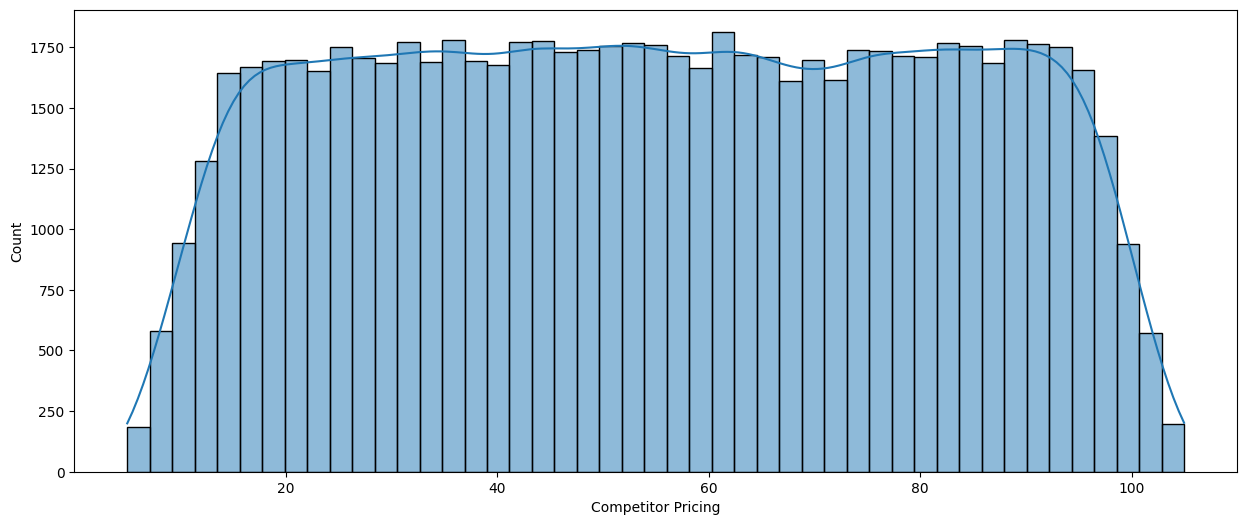

In [38]:
plt.figure(figsize=((15,6)))
sns.histplot(df["Competitor Pricing"],kde=True)

In [39]:
fig = px.histogram(df,
                   x='Competitor Pricing',
                   nbins=10,
                   title='<b>Competitor Price Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['brown']
                   )

fig.show()

In [40]:
SeasonalityCounts = df['Seasonality'].value_counts().reset_index()
SeasonalityCounts

Seasonality  count
0      Spring  18317
1      Summer  18305
2      Winter  18285
3      Autumn  18193

In [41]:
fig = px.bar(SeasonalityCounts,
             x='Seasonality',
             y='count',
             title='<b>Distribution of Seasonality by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#e377c2']
             )
fig.show()

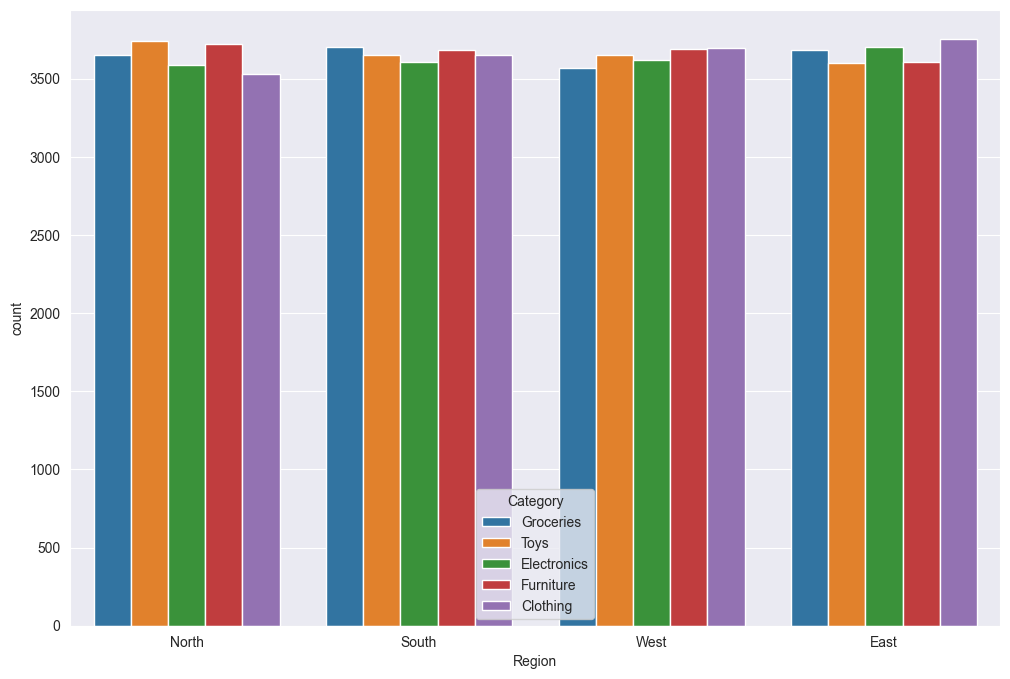

In [42]:
sns.set_style("darkgrid")
 
plt.figure(figsize=(12, 8))

 
sns.countplot(x="Region", hue="Category", data=df)

 
plt.show()

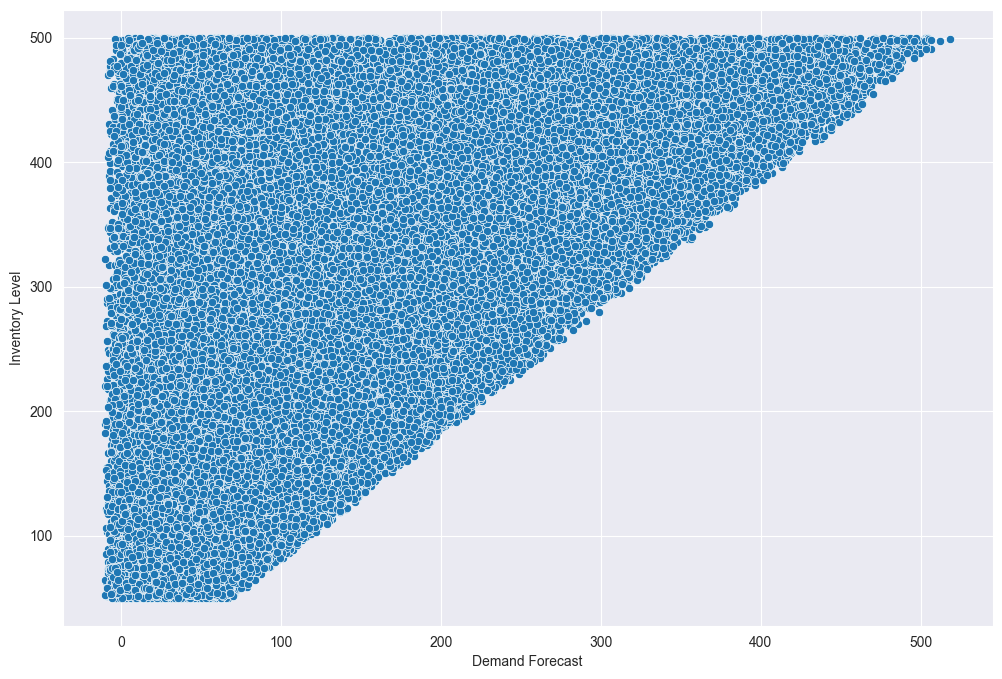

In [43]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Inventory Level'], 
                   
                    )
plt.show()

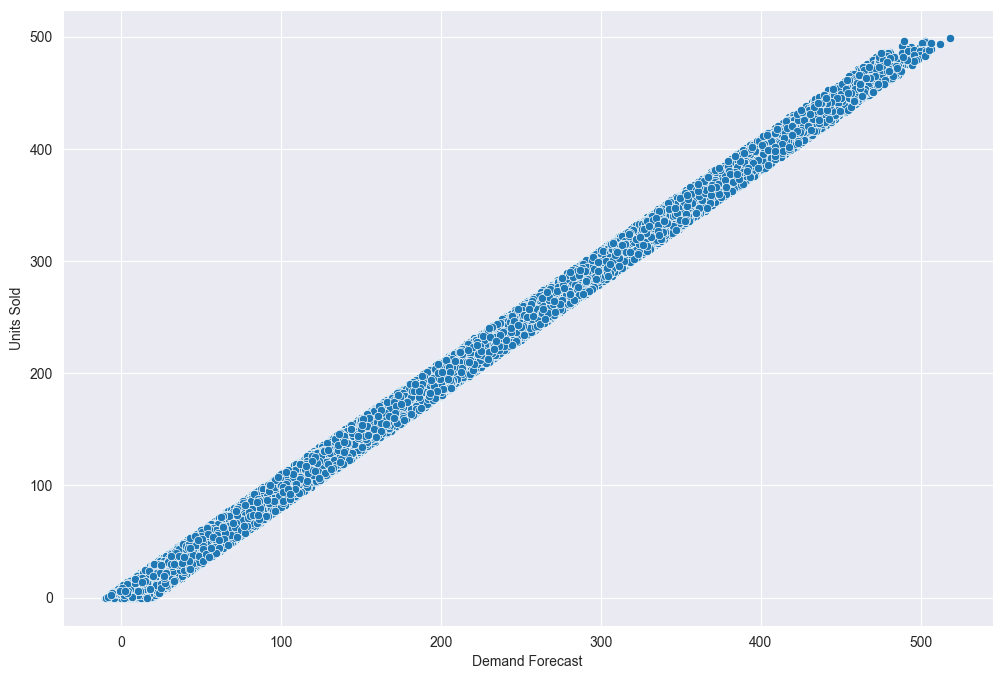

In [44]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Units Sold'], 
                   
                    )
plt.show()

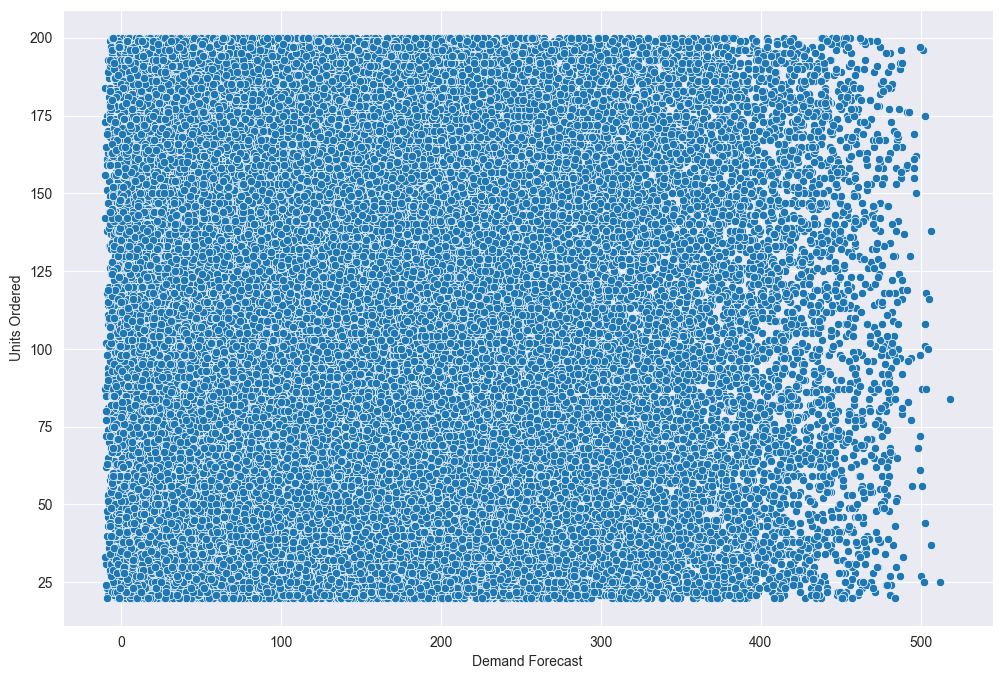

In [45]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Units Ordered'], 
                   
                    )
plt.show()

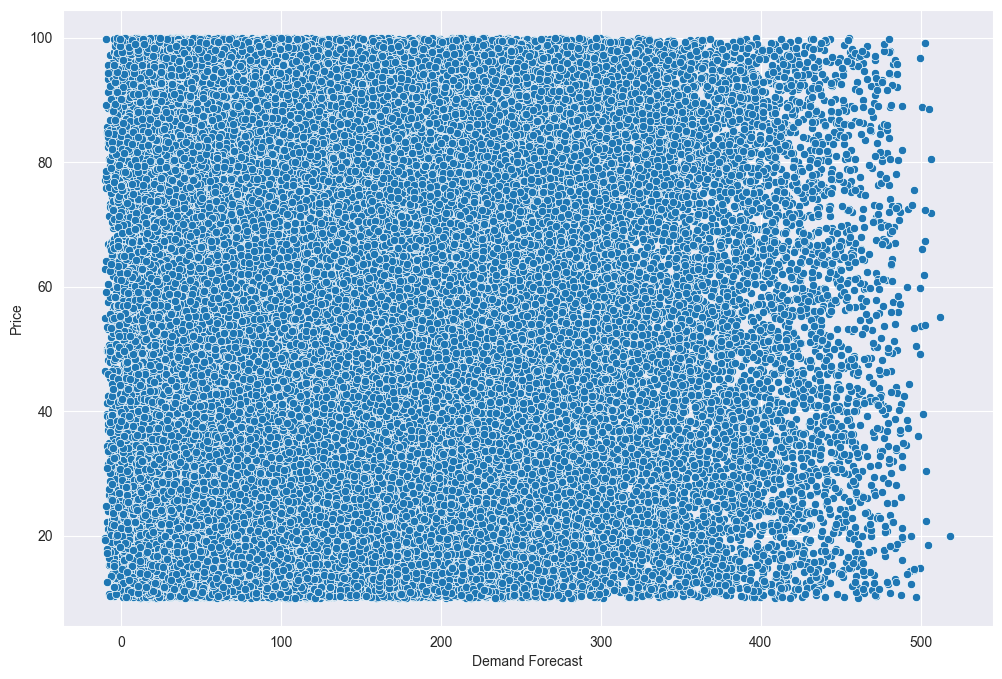

In [46]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Price'], 
                   
                    )
plt.show()

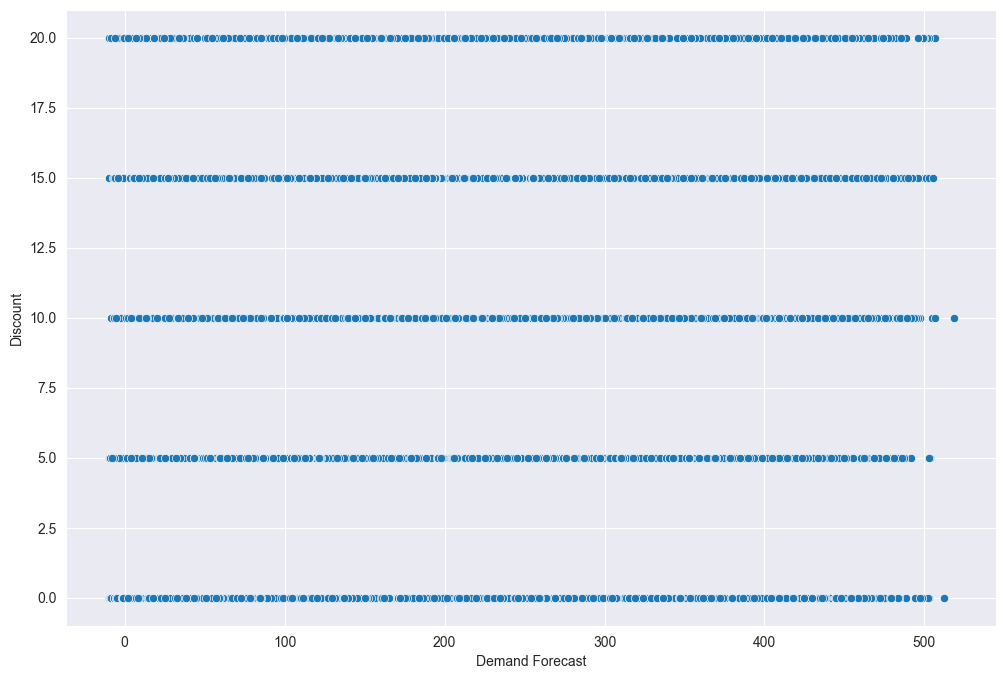

In [47]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Discount'], 
                   
                    )
plt.show()

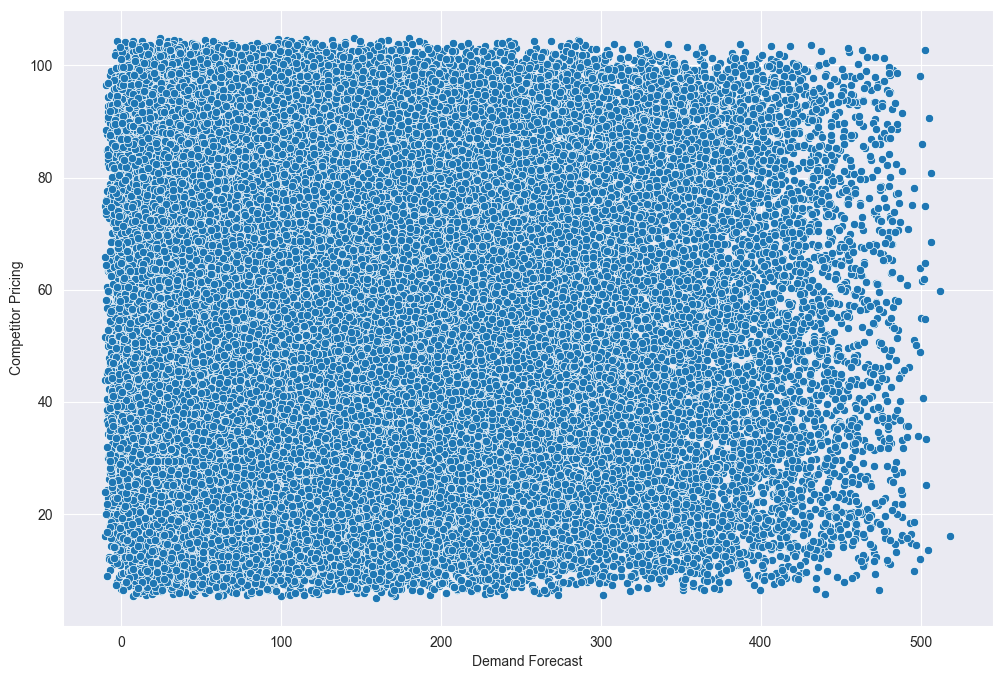

In [48]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Competitor Pricing'], 
                   
                    )
plt.show()

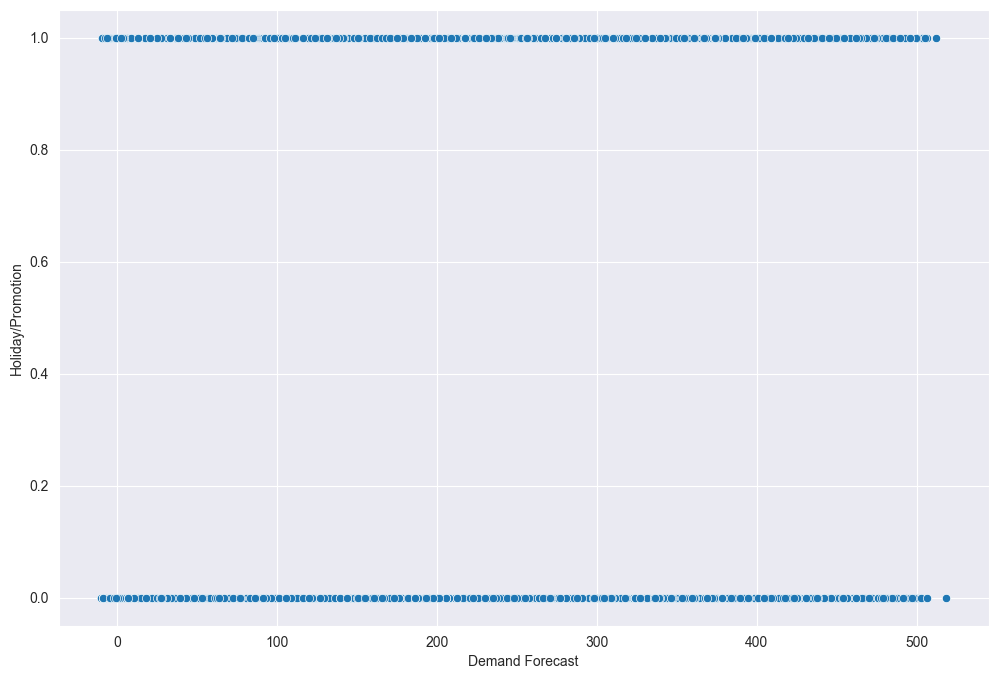

In [49]:
plt.figure(figsize=(12, 8))
fig = sns.scatterplot(
                    x=df['Demand Forecast'],
                    y=df['Holiday/Promotion'], 
                   
                    )
plt.show()

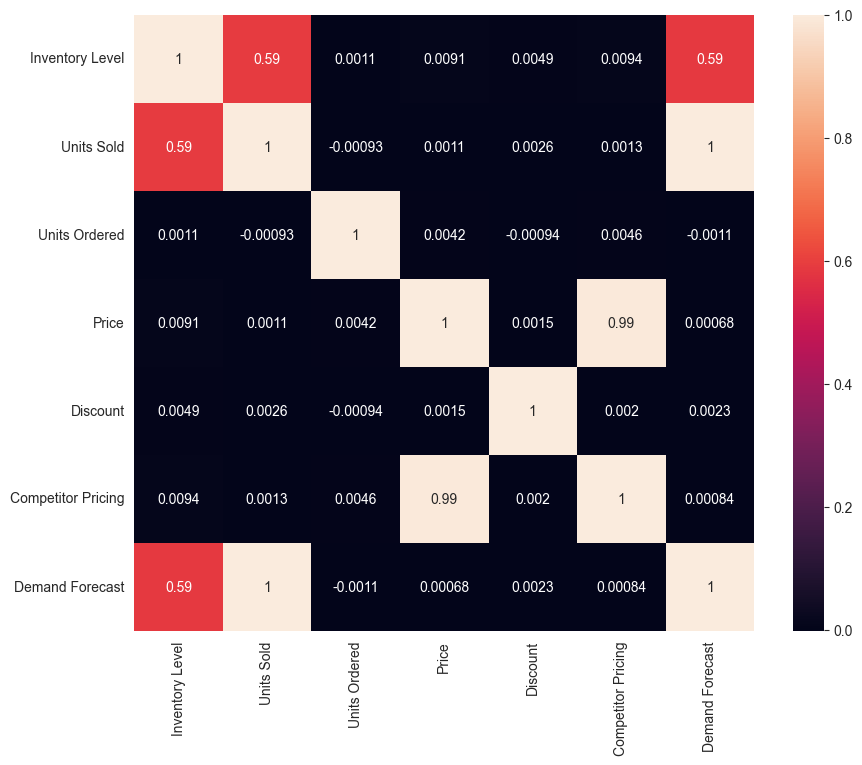

In [50]:
numarical_columns = ['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing','Demand Forecast']
corr_matrix = df[numarical_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True)

plt.show()

In [66]:
x=df.drop(columns=['Demand Forecast'])
y=df['Demand Forecast']

In [67]:
x.head()

Category Region  Inventory Level  Units Sold  Units Ordered  Price  \
0    Groceries  North              231         127             55  33.50   
1         Toys  South              204         150             66  63.01   
2         Toys   West              102          65             51  27.99   
3         Toys  North              469          61            164  32.72   
4  Electronics   East              166          14            135  73.64   

   Discount Weather Condition  Holiday/Promotion  Competitor Pricing  \
0        20             Rainy                  0               29.69   
1        20             Sunny                  0               66.16   
2        10             Sunny                  1               31.32   
3        10            Cloudy                  1               34.74   
4         0             Sunny                  0               68.95   

  Seasonality  
0      Autumn  
1      Autumn  
2      Summer  
3      Autumn  
4      Summer

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Category'] = label_encoder.fit_transform(x['Category'])
x['Region'] = label_encoder.fit_transform(x['Region'])
x['Weather Condition'] = label_encoder.fit_transform(x['Weather Condition'])
x['Seasonality'] = label_encoder.fit_transform(x['Seasonality'])
x['Holiday/Promotion'] = label_encoder.fit_transform(x['Holiday/Promotion'])


In [53]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.70588851, -0.44525719, -0.33451587, ..., -0.99462457,
        -0.97193139, -1.34431734],
       [ 1.41297645,  0.44892689, -0.54229028, ..., -0.99462457,
         0.42051951, -1.34431734],
       [ 1.41297645,  1.34311098, -1.32721586, ...,  1.00540448,
        -0.90969682,  0.4459506 ],
       ...,
       [-1.41537533,  1.34311098,  0.02716553, ..., -0.99462457,
        -1.68896534,  1.34108457],
       [ 1.41297645, -1.33944127,  0.76591902, ..., -0.99462457,
         0.02496724, -0.44918337],
       [ 0.70588851, -1.33944127, -1.21178563, ...,  1.00540448,
         0.93061394, -0.44918337]])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
y_train.value_counts(normalize=True)*100

Demand Forecast
46.06     0.01881
21.84     0.01881
59.44     0.01710
33.84     0.01539
23.35     0.01539
           ...   
73.20     0.00171
345.38    0.00171
383.05    0.00171
223.27    0.00171
33.53     0.00171
Name: proportion, Length: 28737, dtype: float64

In [56]:
! pip install tabulate

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from tabulate import tabulate

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calculate metrics
    train_r2 = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Prepare the table data
    metrics = [
        ["Training R² Score", f"{train_r2:.4f}"],
        ["Testing R² Score", f"{test_r2:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.2f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.2f}"],
        ["Mean Absolute Error (MAE)", f"{mae:.2f}"],
    ]
    
    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

In [64]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [65]:
evaluate_model(lr, x_train, y_train, x_test, y_test)

+--------------------------------+---------+
| Metric                         |   Value |
+================================+=========+
| Training R² Score              |  0.9937 |
+--------------------------------+---------+
| Testing R² Score               |  0.9937 |
+--------------------------------+---------+
| Mean Squared Error (MSE)       | 74.79   |
+--------------------------------+---------+
| Root Mean Squared Error (RMSE) |  8.65   |
+--------------------------------+---------+
| Mean Absolute Error (MAE)      |  7.47   |
+--------------------------------+---------+
